In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca
import generate_linear_model


Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
#For FN data

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()

In [34]:
peak = []
for a in range(np.shape(val_cat)[0]):
    M = []
    for ori in range(8):
        temp = val_cat[a][ori]
        M.append(np.max(temp,axis = 1))
        # peak[a][ori]  = np.max(temp,axis = 1)
    peak.append(M)

peak = np.array(peak, dtype = object)

In [42]:
peak_m = []
dur_cat_m = []
for a in range(np.shape(val_cat)[0]):
    M = []
    M2 = []
    for ori in range(8):
        temp = peak[a][ori]
        temp2 = dur_cat[a][ori]
        M.append(np.mean(temp, axis = 0))
        M2.append(np.mean(temp2, axis = 0))
    peak_m.append(M)
    dur_cat_m.append(M2)

peak_m = np.array(peak_m)
dur_cat_m = np.array(dur_cat_m)

In [51]:
final = []
for ori_num in range(8):
    temp_data = data_cat_sm[ori_num, :, :]
    pram = np.array([peak_m[:, ori_num], dur_cat_m[:, ori_num]])
    pram2= np.mean(pram, axis = 1)
    
    linmod = generate_linear_model.generate_linear_model(temp_data, pram, pram2)
    final.append(linmod)

In [57]:
plot_data = {}
for ori_num in range(8):
    
    temp = final[ori_num]

    pp1 = temp['wv0']
    pp2 = temp['wv']
    pp3 = temp['wr']
    pp4 = temp['ssc']
    pp5 = temp['ssc0']

    plot_data[ori_num] = [pp1, pp2, pp3, pp4, pp5]

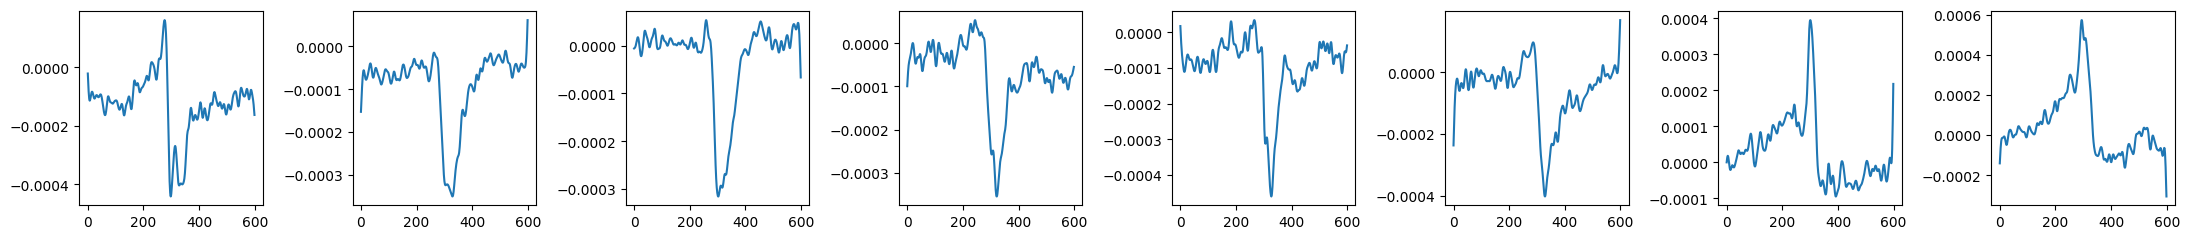

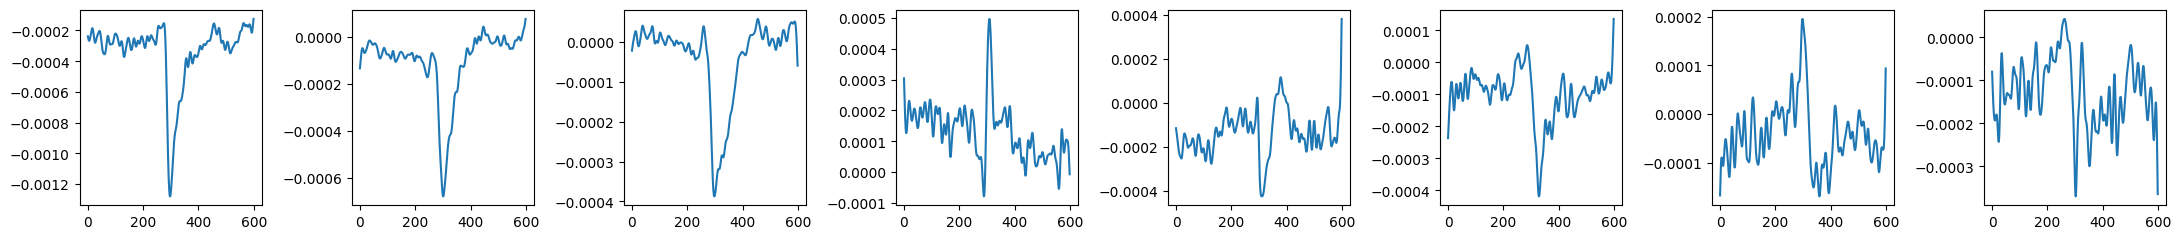

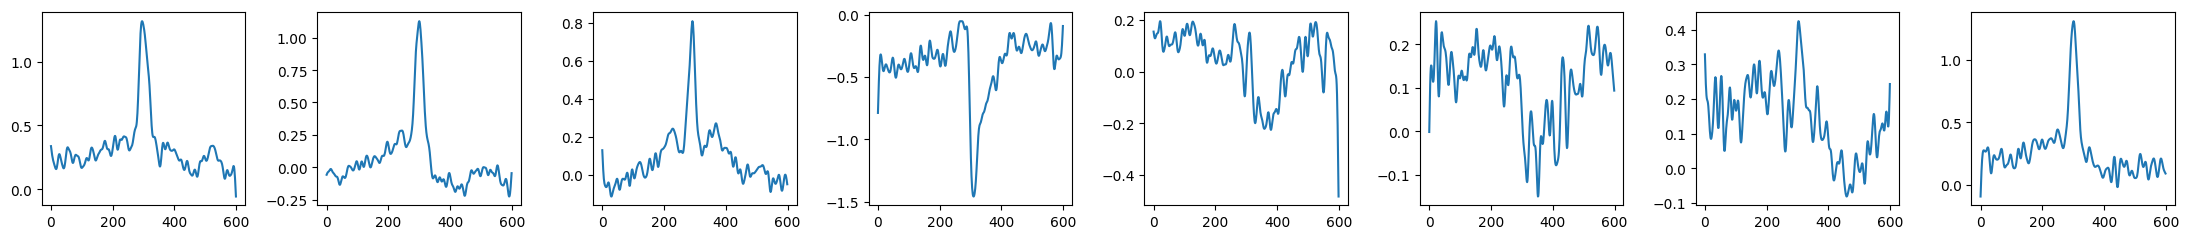

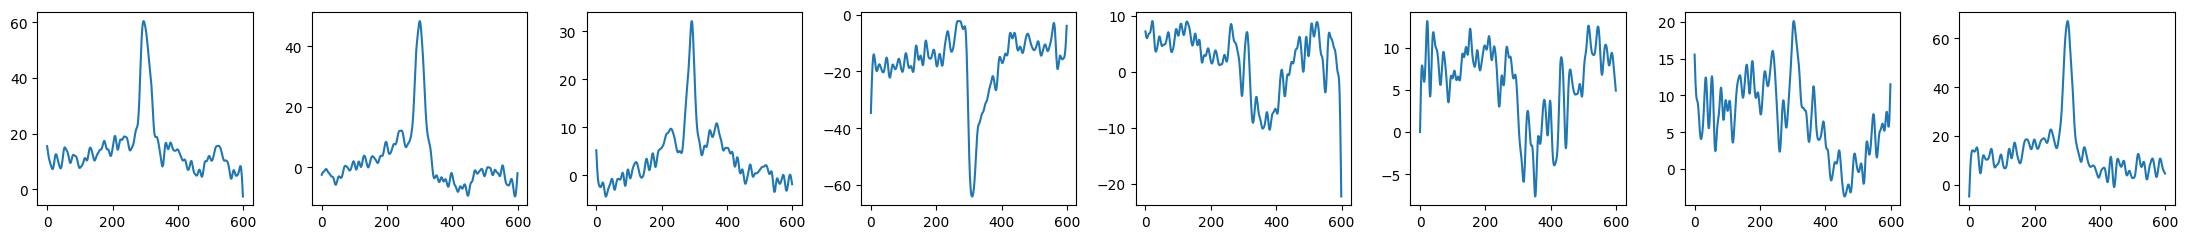

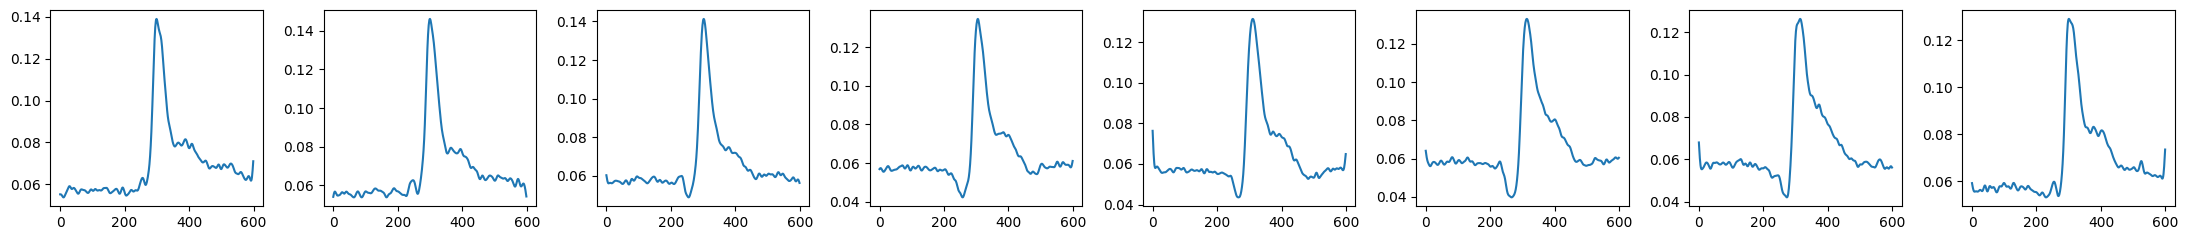

In [66]:
# Plotting 1
from matplotlib import gridspec

for b in range(5):
    fig = plt.figure(figsize=(22, 2.5))
    gs = gridspec.GridSpec(1, 8)
    for a in range(8):
        ax = fig.add_subplot(gs[0, a])
        ax.plot(plot_data[a][b])
    plt.tight_layout()
    plt.show()